# Using 5 variables to produce a model to predict the diagnosis of heart disease using classification (closer to 0 or 1)

#### DSCI 100 Group 36 : Kaitlin Khu, Andrea Marie Cabrera, Jennifer Yujin Choi, Jaskaran Singh


## Introduction:

### Background information:

Heart disease is a generalization of multiple separate conditions that include blood vessel diseases, arrhythmias, congenital heart defects, heart valve disease, heart infection, and problems with the heart muscle. Often caused by buildup of plaques in the arteries that results in thinner blood vessels, due to poor decision of lifestyle, such as smoking, health conditions such as high blood pressure, high cholesterol and diabetes, and a diet high in salt and saturated fats. In addition, heart disease can result in deadly complications such as heart failure and attacks, strokes, sudden cardiac arrest and more. (American Heart Association, 2017)

### Research question:
Through this project, we aim to produce a model to predict the diagnosis of heart disease using several classification techniques and algorithms in machine learning and language R. Specifically, this project aims to determine if the attributes, age, trestbps, chol, thalach, oldpeak, and num, are sufficient to produce an accurate model for predicting the risk of heart disease.

### Dataset information:
We will be using multivariate data sets from the Heart Disease Data Set published by the University of California Irvine’s Machine Learning Repository. Looking specifically at data from Cleveland, Hungary and Switzerland, using 5 attributes to generate a predictive model. (Chellammal & Sharmila, 2019)

**(Table 1.1)** *- Description and general values of attributes to be used*

Attribute|Value|Description
:-----:|:-----:|:----- 
age|25-75|Individual’s age in years 
trestbps|90-170mm/Hg|Individuals’ resting blood pressure
chol|<250mg/dL|Cholesterol levels
thalach|100-190 bpm|Individual’s maximum heart rate reached
oldpeak|0-4.2 in decimals|ST depression induced by exercise relative to rest 
diag|0 or 1|Angiographic Disease Status (< 50% diameter narrowing or > 50% diameter narrowing)

####  Predictors to be Used (Reasoning):

**Trestbps:** Based on the graph for the trestbps predictor we can see that having blood pressure levels on the higher side leads to patients with heart disease. We chose to include blood pressure as it plays a large role in determining the chances of having heart disease. High blood pressure can likely be a result of buildup of plaque as well as the narrowing of blood vessels. 

**Age:** The graph for the age predictor shows that older people are more prone to heart disease. Age is an incredibly important factor in this model as aging bodies lead to further complications that can occur due to deteriorating health. 

**Oldpeak:** The ST depression induced by exercise relative to rest. We chose to use this variable as this information can be used to determine obstructive coronary atherosclerosis (a form of heart disease likely covered in this dataset)

**Chol** Patients with higher cholesterol are more likely to be diagnosed with heart disease. However, it is seen to be less of a crucial component to our analysis due to its lack of influence on the target variable's outcome. We originally chose this predictor thinking of cholesterol's relationship to plaque buildup in arteries. 

**Thalach** We chose to use thalach as maximum heart rate can be a tell as it is a factor that can accurately portray the maximum oxygen consumption the body can take -- most aspects of heart disease limit this through destructive processes. 

*all of these predictors were specifically highlighted by the site provided for this dataset


## Preliminary exploratory data analysis:

In [2]:
set.seed(1234) #set seed

#loading libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(cowplot)
library(modeldata)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

### **[✔]** data can be loaded from R

In [3]:
# loading cleaveland dataset
# column names were chosen based on the existing column names in dataset
# except for num, which was changed to diag, short for diagnosis

cleveland_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
         col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","diag")) 
head(cleveland_data)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  diag = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diag
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


### **[✔]** data has been cleaned and wrangled into a tidy format

In [4]:
cleveland_filtered_data <- cleveland_data %>%
                    select(age,trestbps,thalach,chol,oldpeak,diag)%>% #selected the categories decided on (explained below)
                    filter(diag==0|diag==1) %>% #only selected diag values of 0 and 1; values 2-4 were found originally but dataset didn't say what those values meant
                    mutate(diag = as.factor(diag)) %>% #changed diag (target variable) from double -> factor
                    filter(!is.na(age), !is.na(trestbps), !is.na(thalach), !is.na(chol), !is.na(oldpeak), !is.na(diag)) #if any NA's in each column, removes them

head(cleveland_filtered_data)

age,trestbps,thalach,chol,oldpeak,diag
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,150,233,2.3,0
67,120,129,229,2.6,1
37,130,187,250,3.5,0
41,130,172,204,1.4,0
56,120,178,236,0.8,0
57,120,163,354,0.6,0


### **[✔]** data was split into training and testing data (displayed table: training data)

In [5]:
cleveland_split<-initial_split(cleveland_filtered_data,prop=0.75,strata=diag)  #splitting cleveland's data 
cleveland_training<-training(cleveland_split)
cleveland_testing<-testing(cleveland_split)

head(cleveland_training)

age,trestbps,thalach,chol,oldpeak,diag
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,150,233,2.3,0
67,120,129,229,2.6,1
41,130,172,204,1.4,0
57,120,163,354,0.6,0
53,140,155,203,3.1,1
57,140,148,192,0.4,0


### **[✔]** data summary (training)

In [6]:
#creating a table with training set and their summaries (mean, median, sd)
#creating a table to determine number of 'classes' in the target variable 'diag'

age_stats_training <- cleveland_training %>% 
             summarize(mean = mean(age), median = median(age), sd = sd(age)) %>%
             mutate(predictor="age") #providing an "id" column to identify the predictor variable 

thalach_stats_training <- cleveland_training %>% 
             summarize(mean = mean(thalach), median = median(thalach), sd = sd(thalach)) %>%
             mutate(predictor="thalach")

trestbps_stats_training <- cleveland_training %>% 
             summarize(mean = mean(trestbps), median = median(trestbps), sd = sd(trestbps)) %>%
             mutate(predictor="trestbps")

oldpeak_stats_training <- cleveland_training %>% 
             summarize(mean = mean(oldpeak), median = median(oldpeak), sd = sd(oldpeak)) %>%
             mutate(predictor="oldpeak")

chol_stats_training <- cleveland_training %>% 
             summarize(mean = mean(chol), median = median(chol), sd = sd(chol)) %>%
             mutate(predictor="chol")

diag_stats_training <- cleveland_training %>%
             summarize(diag_0 = sum(diag=="0"), diag_1 = sum(diag=="1"))

cleveland_stats_training <- rbind(age_stats_training, thalach_stats_training, trestbps_stats_training, oldpeak_stats_training, chol_stats_training) #binding all the predictor stats into one table 
cleveland_stats_training <- cleveland_stats_training[, c(4, 1, 2, 3)] #moving the predictor category to the first column instead of the last
cleveland_stats_training 
diag_stats_training

predictor,mean,median,sd
<chr>,<dbl>,<dbl>,<dbl>
age,53.4363636,54.0,9.2593334
thalach,155.3393939,159.0,20.8096767
trestbps,130.2484848,130.0,15.8119305
oldpeak,0.6927273,0.4,0.8284988
chol,246.9818182,240.0,52.4266587


diag_0,diag_1
<int>,<int>
123,42


In [7]:
#creating a table with the testing set and their summaries (mean, median, sd)
#creating a table to determine number of 'classes' in the target variable 'diag'

age_stats_testing <- cleveland_testing %>% 
             summarize(mean = mean(age), median = median(age), sd = sd(age)) %>%
             mutate(predictor="age") #providing an "id" column to identify the predictor variable 

thalach_stats_testing <- cleveland_testing %>% 
             summarize(mean = mean(thalach), median = median(thalach), sd = sd(thalach)) %>%
             mutate(predictor="thalach")

trestbps_stats_testing <- cleveland_testing %>% 
             summarize(mean = mean(trestbps), median = median(trestbps), sd = sd(trestbps)) %>%
             mutate(predictor="trestbps")

oldpeak_stats_testing <- cleveland_testing %>% 
             summarize(mean = mean(oldpeak), median = median(oldpeak), sd = sd(oldpeak)) %>%
             mutate(predictor="oldpeak")

chol_stats_testing <- cleveland_testing %>% 
             summarize(mean = mean(chol), median = median(chol), sd = sd(chol)) %>%
             mutate(predictor="chol")

diag_stats_testing <- cleveland_testing %>%
             summarize(diag_0 = sum(diag=="0"), diag_1 = sum(diag=="1"))

cleveland_stats_testing <- rbind(age_stats_testing, thalach_stats_testing, trestbps_stats_testing, 
                                 oldpeak_stats_testing, chol_stats_testing) #binding all the predictor stats into one table 

cleveland_stats_testing <- cleveland_stats_testing[, c(4, 1, 2, 3)] #moving the predictor category to the first column instead of the last

cleveland_stats_testing 
diag_stats_testing

predictor,mean,median,sd
<chr>,<dbl>,<dbl>,<dbl>
age,52.8333333,54.00,9.1646367
thalach,154.9814815,154.50,21.1102146
trestbps,130.2777778,130.00,19.4309777
oldpeak,0.6888889,0.25,0.9472237
chol,235.9629630,234.50,43.7587567


diag_0,diag_1
<int>,<int>
41,13


### **[✔]** training data was used for exploratory data analysis

#### graph for exploratory data analysis

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



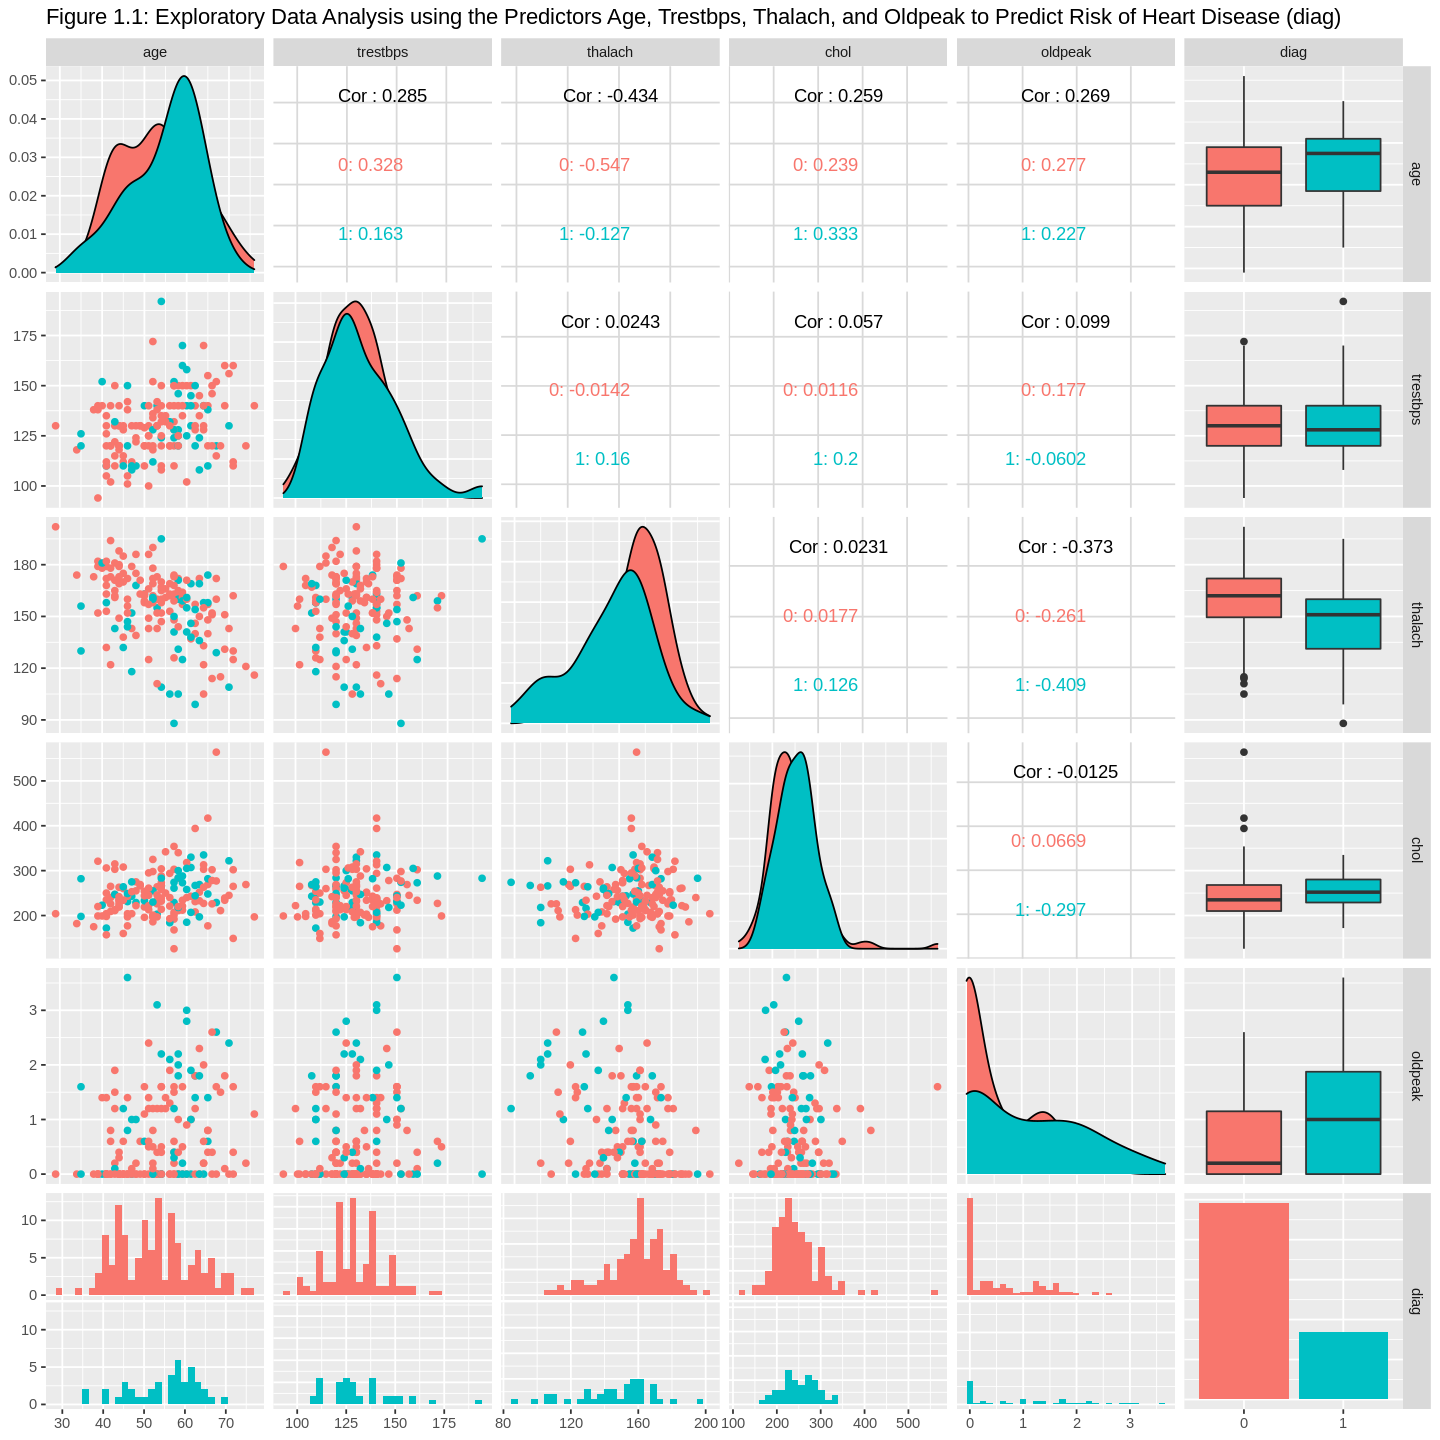

In [8]:
# code for ggpairs

options(repr.plot.width=12, repr.plot.height=12) #set plot width and height

# below is code for scaling dataset
# heart_disease_scaled <- heart_disease_training %>%
#                         select(-diag) %>%
#                         map_df(scale) %>%
#                         mutate(diag = heart_disease_training$diag)
#data was not scaled when data is scaled it shows NA instead of the graphs for the ggpairs

heart_disease_graph <- ggpairs(cleveland_training, columns = 1:6, #used all columns
                        title="Figure 1.1: Exploratory Data Analysis using the Predictors Age, Trestbps, Thalach, and Oldpeak to Predict Risk of Heart Disease (diag)", 
                        ggplot2::aes(colour=diag)) #sets color to correspond to diag

heart_disease_graph

#### Visualization for Showing Correlation Coefficient

The **correlation coefficient** is a measure that determines the degree to which the movement of two variables is associated. The strength of a linear relationship between two variables is measured using correlation coefficients. A **positive relationship** is indicated by a *correlation coefficient greater than zero*, while a **negative relationship** is indicated by a *value less than zero*. The possible range of values for the correlation coefficient is -1.0 to 1.0. 

## Methods:

### Conduction of Data Analysis

Classification analysis will be used as the main method for the project. The five values to be used as predictors were selected from the 13 most relevant attributes, excluding the attribute “diag” which is the factor to be predicted,  in the heart disease data set. These were specifically chosen as the other eight attributes were factor variables, which could not be effectively used in the classification.

Based on the correlation coefficients generated in Figure 1.2, all of the values have been observed to have a relationship, with age:trestbps, age:thalach, age:oldpeak, and thalach:oldpeak having the coefficients with the highest magnitude.


### Training the Model:

In [9]:
set.seed(1234)
#in order to preform cross validation with the step_upscale() function, we have to manually separate the training data
#split the training data into 5 parts

#split 1
split_1 <- initial_split(cleveland_filtered_data, strata=diag, prop=0.8) 
part_1 <- testing(split_1) 

#split 2
split_2 <- initial_split(training(split_1), strata=diag, prop=0.75)
part_2 <- testing(split_2)

#split 3
split_3 <- initial_split(training(split_2), strata=diag, prop=2/3)
part_3 <- testing(split_3)

#split 4
split_4 <- initial_split(training(split_3), strata=diag, prop=0.5)
part_4 <- testing(split_4)

#split 5
part_5 <- training(split_4)

#combining 4 to make "training" and leaving 1 for validation
#repeat this process 5 times with different folds for the validation set
train_1 <- rbind(part_1, part_2, part_3, part_4)
val_1 <- part_5

train_2 <- rbind(part_1, part_2, part_3, part_5)
val_2 <- part_4

train_3 <- rbind(part_1, part_2, part_5, part_4)
val_3 <- part_3

train_4 <- rbind(part_1, part_5, part_3, part_4)
val_4 <- part_2

train_5 <- rbind(part_5, part_2, part_3, part_4)
val_5 <- part_1

In [10]:
# all knn values
set.seed(1234)

#these k values were chosen to span the range of k values given by TA! :>

#knn_spec for k = 4
knn_4 <- nearest_neighbor(weight_func = "rectangular", neighbors=4) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#knn_spec for k = 8
knn_8 <- nearest_neighbor(weight_func = "rectangular", neighbors=8) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#knn_spec for k = 12
knn_12 <- nearest_neighbor(weight_func = "rectangular", neighbors=12) %>%
    set_engine("kknn") %>%
    set_mode("classification")

In [11]:
#upsampling 
set.seed(1234)

#create a recipe with all predictors for each split of the training set
#use step_upsample() function to help balance the data
#use the step_upsample() function and set the skip argument to TRUE, and over_ratio argument to 1. 
#scale all predictors 

#for train_1
upsample_recipe_1 <- recipe(diag ~ age + trestbps + chol + thalach + oldpeak, data = train_1) %>%
    step_upsample(diag, over_ratio = 1, skip = TRUE) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#for train_2
upsample_recipe_2 <- recipe(diag ~ age + trestbps + chol + thalach + oldpeak, data = train_2) %>%
    step_upsample(diag, over_ratio = 1, skip = TRUE) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#for train_3
upsample_recipe_3 <- recipe(diag ~ age + trestbps + chol + thalach + oldpeak, data = train_3) %>%
    step_upsample(diag, over_ratio = 1, skip = TRUE) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#for train_4
upsample_recipe_4 <- recipe(diag ~ age + trestbps + chol + thalach + oldpeak, data = train_4) %>%
    step_upsample(diag, over_ratio = 1, skip = TRUE) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#for train_5
upsample_recipe_5 <- recipe(diag ~ age + trestbps + chol + thalach + oldpeak, data = train_5) %>%
    step_upsample(diag, over_ratio = 1, skip = TRUE) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#we grouped the following cells like this one, so for each k value there should be separate cells for each step we took
#so we put all the knn_fit's together for each train_n, etc. 
#we did this to increase readability and organize our steps. 

Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


##### knn_fit, prediction, and accuracies code for k=4

In [12]:
# fit for k4

#putting all the knn_fit's here for when the k value is 4
#use separate upsample recipes created above for each train_n 
#fit data to train_n

#using upsampling data 1
knn_fit_1_k4 <- workflow() %>%
     add_recipe(upsample_recipe_1) %>% #use specific recipe's for different splits of the training data
     add_model(knn_4) %>% #make sure to use the correct knn specifications for different k values
     fit(data=train_1)

#using upsampling data 2
knn_fit_2_k4 <- workflow() %>%
     add_recipe(upsample_recipe_2) %>%
     add_model(knn_4) %>%
     fit(data=train_2)

#using upsampling data 3
knn_fit_3_k4 <- workflow() %>%
     add_recipe(upsample_recipe_3) %>%
     add_model(knn_4) %>%
     fit(data=train_3)

#using upsampling data 4
knn_fit_4_k4 <- workflow() %>%
     add_recipe(upsample_recipe_4) %>%
     add_model(knn_4) %>%
     fit(data=train_4)

#using upsampling data 5
knn_fit_5_k4 <- workflow() %>%
     add_recipe(upsample_recipe_5) %>%
     add_model(knn_4) %>%
     fit(data=train_5)

In [13]:
#predict and accuracies for k4
#use the fitted models created above to preform cross validation with the validation sets that corr. to each train_n
#basically manually cross validate the further split training data

#using upsampling data 1
predict_1_k4 <- predict(knn_fit_1_k4, val_1) %>% #make sure to use correctly fitted  model here with the correct validation set
    bind_cols(val_1) #binds validation sets data points

accuracies_1_k4 <- predict_1_k4 %>% 
     metrics(truth = diag, estimate = .pred_class) %>% 
     filter(.metric == "accuracy") # filters .metric column to only show "accuracy" values 

#using upsampling data 2
predict_2_k4 <- predict(knn_fit_2_k4, val_1) %>%
    bind_cols(val_1)

accuracies_2_k4 <- predict_2_k4 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

#using upsampling data 3
predict_3_k4 <- predict(knn_fit_3_k4, val_1) %>%
    bind_cols(val_1)

accuracies_3_k4 <- predict_3_k4 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

#using upsampling data 4
predict_4_k4 <- predict(knn_fit_4_k4, val_1) %>%
    bind_cols(val_1)

accuracies_4_k4 <- predict_2_k4 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

#using upsampling data 5
predict_5_k4 <- predict(knn_fit_5_k4, val_1) %>%
    bind_cols(val_1)

accuracies_5_k4 <- predict_5_k4 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

##### knn_fit, prediction, and accuracies code for k=8

In [14]:
#fitting for k8
#repeat the steps done for k = 4 with k = 8, starting with creating a recipe with the upsample function

#using upsampling data 1
knn_fit_1_k8 <- workflow() %>%
     add_recipe(upsample_recipe_1) %>%
     add_model(knn_8) %>%
     fit(data=train_1)

#using upsampling data 2
knn_fit_2_k8 <- workflow() %>%
     add_recipe(upsample_recipe_2) %>%
     add_model(knn_8) %>%
     fit(data=train_2)

#using upsampling data 3
knn_fit_3_k8 <- workflow() %>%
     add_recipe(upsample_recipe_3) %>%
     add_model(knn_8) %>%
     fit(data=train_3)

#using upsampling data 4
knn_fit_4_k8 <- workflow() %>%
     add_recipe(upsample_recipe_4) %>%
     add_model(knn_8) %>%
     fit(data=train_4)

#using upsampling data 5
knn_fit_5_k8 <- workflow() %>%
     add_recipe(upsample_recipe_5) %>%
     add_model(knn_8) %>%
     fit(data=train_5)

In [15]:
#predict and accuracies with k8
#repeat steps for k = 4 with k = 8!

#using upsampling data 1
predict_1_k8 <- predict(knn_fit_1_k8, val_1) %>%
    bind_cols(val_1)

accuracies_1_k8 <- predict_1_k8 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

#using upsampling data 2
predict_2_k8 <- predict(knn_fit_2_k8, val_2) %>%
    bind_cols(val_2)

accuracies_2_k8 <- predict_2_k8 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

#using upsampling data 3
predict_3_k8 <- predict(knn_fit_3_k8, val_3) %>%
    bind_cols(val_3)

accuracies_3_k8 <- predict_3_k8 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

#using upsampling data 4
predict_4_k8 <- predict(knn_fit_4_k8, val_4) %>%
    bind_cols(val_4)

accuracies_4_k8 <- predict_4_k8 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

#using upsampling data 5
predict_5_k8 <- predict(knn_fit_5_k8, val_5) %>%
    bind_cols(val_5)

accuracies_5_k8 <- predict_5_k8 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

##### knn_fit, prediction, and accuracies code for k=12

In [16]:
#fit upsampling 1->5 to knn_12
#repeat steps for k = 4 with k = 12!

#using upsampling data 1
knn_fit_1_k12 <- workflow() %>%
     add_recipe(upsample_recipe_1) %>%
     add_model(knn_12) %>%
     fit(data=train_1)

#using upsampling data 2
knn_fit_2_k12 <- workflow() %>%
     add_recipe(upsample_recipe_2) %>%
     add_model(knn_12) %>%
     fit(data=train_2)

#using upsampling data 3
knn_fit_3_k12 <- workflow() %>%
     add_recipe(upsample_recipe_3) %>%
     add_model(knn_12) %>%
     fit(data=train_3)

#using upsampling data 4
knn_fit_4_k12 <- workflow() %>%
     add_recipe(upsample_recipe_4) %>%
     add_model(knn_12) %>%
     fit(data=train_4)

#using upsampling data 5
knn_fit_5_k12 <- workflow() %>%
     add_recipe(upsample_recipe_5) %>%
     add_model(knn_12) %>%
     fit(data=train_5)

In [17]:
#predicting and seeing accuracies with k = 12
#repeat steps from k = 4 with k = 12 again here too!

#using upsampling data 1
predict_1_k12 <- predict(knn_fit_1_k12, val_1) %>%
    bind_cols(val_1)

accuracies_1_k12 <- predict_1_k12 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

#using upsampling data 2
predict_2_k12 <- predict(knn_fit_2_k12, val_2) %>%
    bind_cols(val_2)

accuracies_2_k12 <- predict_2_k12 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

#using upsampling data 3
predict_3_k12 <- predict(knn_fit_3_k12, val_3) %>%
    bind_cols(val_3)

accuracies_3_k12 <- predict_3_k12 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

#using upsampling data 4
predict_4_k12 <- predict(knn_fit_4_k12, val_4) %>%
    bind_cols(val_4)

accuracies_4_k12 <- predict_4_k12 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

#using upsampling data 5
predict_5_k12 <- predict(knn_fit_5_k12, val_5) %>%
    bind_cols(val_5)

accuracies_5_k12 <- predict_5_k12 %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

##### Computation of Accuraries for each knn model (k=4, k=8, k=12)

In [18]:
# accuracies for three values of k (k4,k8,k12)
#use rbind() function to bind all 5 accuracies for each k value 

#k4 accuracy overall

accuracy_all_k4 <- rbind(accuracies_1_k4, accuracies_2_k4, accuracies_3_k4, accuracies_4_k4, accuracies_5_k4) %>%
                summarize(mean = mean(.estimate))

accuracy_all_k4

#k8 accuracy overall

accuracy_all_k8 <- rbind(accuracies_1_k8, accuracies_2_k8, accuracies_3_k8, accuracies_4_k8, accuracies_5_k8) %>%
                summarize(mean = mean(.estimate))

accuracy_all_k8

#k12 accuracy overall

accuracy_all_k12 <- rbind(accuracies_1_k12, accuracies_2_k12, accuracies_3_k12, accuracies_4_k12, accuracies_5_k12) %>%
                summarize(mean = mean(.estimate))

accuracy_all_k12

mean
<dbl>
0.7911111


mean
<dbl>
0.5799423


mean
<dbl>
0.5441847


In [19]:
set.seed(1234) #setting the seed to allow for reproducability

#recipe for final model, with upscaling and scaled variables
final_recipe <- recipe(diag ~ age + trestbps + chol + thalach + oldpeak, data = cleveland_training) %>%
    step_upsample(diag, over_ratio = 1, skip = TRUE) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#final workflow using training dataset, using knn model with k=4
knn_fit_final <- workflow() %>%
     add_recipe(final_recipe) %>%
     add_model(knn_4) %>%
     fit(data=cleveland_training)

#prediction table using testing data
predict_final <- predict(knn_fit_final, cleveland_testing) %>%
    bind_cols(cleveland_testing)

#prediction table using testing data
accuracies_final <- predict_final %>% 
     metrics(truth = diag, estimate = .pred_class) %>%
     filter(.metric == "accuracy")

accuracies_final

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5555556


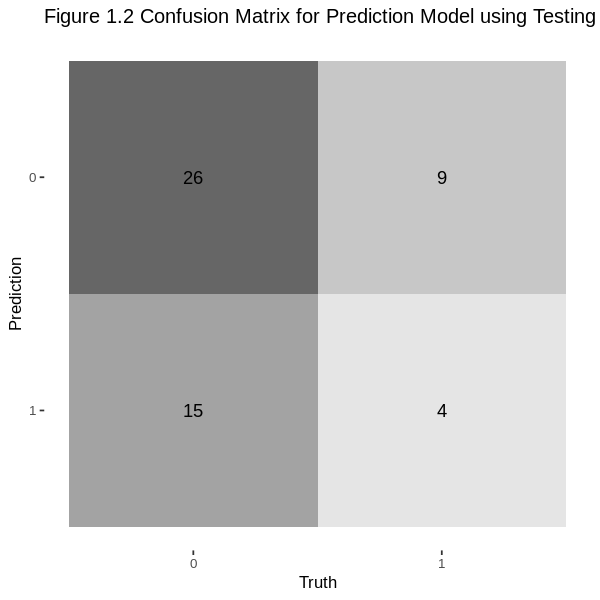

In [20]:
#setting final visualization dimensions
options(repr.plot.width=5, repr.plot.height=5) 

#creating confusion matrix table
confusion_matrix <- conf_mat(predict_final, truth = diag, estimate = .pred_class) 

#producing conf mat graph output
autoplot(confusion_matrix, type = "heatmap") + theme(text = element_text(size = 10)) + 
    ggtitle("Figure 1.2 Confusion Matrix for Prediction Model using Testing Data") 

**(Confusion Matrix)** With reference to the confusion matrix, (0,0) and (1,1) implies that the model accurately predicts that a patient is less likely and likely to have heart disease, whereas (0,1) and (1,0) denotes otherwise. (This visualization portrays the instances our model has gotten its diagnoses correct and incorrect for each point we had in our testing data). 


## Discussion

### Reasoning for Methodology
Due to Cleveland’s class imbalance, the diagnosis of having less of a likelihood of getting heart disease appeared more commonly and essentially dominated the dataset, it resulted in a biased model, as the diagnosis of having a higher likelihood was relatively scarce. Hence, to counteract the unbalanced data, we initially chose to upsample the data, in our recipe, to oversample the diagnosis class of having a higher likelihood of getting heart disease, giving them more voting power in the KNN algorithm. However, based on the step_upsample(), the estimated accuracy for the heart disease came out to be 0.5926 which is significantly less than the estimated accuracy calculated using the cross validation method. So, to counter this, we attempted to use upsample again by splitting the training set into five more folds, on which we manually preformed cross validation for a few values of k that we chose that portrayed the range of k. After this, we selected the k value to gave the highest mean (accuracy) and put it back into the model. 

### Summarization and Impacts of Findings
At first, we decided to carry out without upscaling and just using cross validation as it presented a higher accuracy. Our results presented a production of a k-nn classification model that predicted the likelihood of a Cleveland patient having heart disease. Our model was shown to have a prediction accuracy of 55.55%, accompanied with its best neighbours of K=4. However, this percentage accuracy was anticipated to be higher in the manual cross validation conducted, which returned a value of 79.11%. Regardless, this prediction accuracy was definitely not high enough to be effectively used as a reliable model to determine a patient’s medical condition. 
After retraining our model by upscaling and manually cross validating further split training data, we created a model that did not depend on the majority vote (but had a lower prediction accuracy). This accuracy was still not high enough to be used in the medical field to diagnose anyone of any condition definitely, but we figured it could become an excellent instrument to efficiently estimate a patient’s condition using medical data to *some* degree of accuracy. To add on, due to the use of multiple predictors, it was not ideal to construct a scatter plot to observe the reliability of the model. Hence, we constructed a confusion matrix visualization to demonstrate quantitatively what datapoints our model accurately and inaccurately predicted. It was shown that the model was mostly predicting type diag = 0. This happened, possibly due to the model using the unbalanced Cleveland dataset. Since this appeared to be the case, we determined that this was not going to be an effective model.
 
The matrix shows that the model accurately predicted 26 patients to be less likely to have heart disease and 4 to be more likely to have heart disease. This prediction could generate a positive impact towards society as it highlights the likelihood of heart disease beforehand, allowing doctors to gain a general idea of whether their patient is more likely to be at risk of heart disease with the data they have. In addition, it provides information for patients to take preventive action to combat the possibility of being diagnosed with heart disease. Although the model is nowhere near perfect and cannot be relied on as the definite predictor of one’s health, it can be used effectively as a tool that can predict a patient's condition with some degree of accuracy. This allows for hospitals to gain some sort of insight of what needs to be prepared/tested for particular patients, an incredibly important step in the regaining of health for every patient.


## Expected Outcomes and Significance:

### Expected findings: 
With the help of our model, we expect to be able to accurately predict whether an individual is more likely to have heart disease or not, if the resulting value is closer to 0 (higher risk of heart disease) or 1 (lower risk of heart disease)

### Impacts of findings: 
With deriving an accurate prediction model, it can aid the prediction of the presence or absence of heart disease, which is crucial to diagnose the disease at an early stage to prevent the development of severity that leads to life-threatening complications. Thus, providing medical professionals access to predicted knowledge which can highlight which patients are in dire need of medical attention versus those that are in need of less.

### Future questions:
+ How many attributes should be used to produce a model with better accuracy?
+ What other attributes from the data set can be used to improve the accuracy of the model? This is referring to the other 62 variables that were not used in previous experiments using the data set.



### Reflection: 

This project has given us an oportunity to interpret a data set, create our own prediction and conclusion without concrete instructions. Due to this, we came across unexpected results in our model. However, we believe that our results have given us persepctive on how difficult it is to create a precise model that fits our assumptions. 

## References:

    American Heart Association. (2017, May 31). What is cardiovascular disease? www.heart.org. Retrieved November 7, 2021, from https://www.heart.org/en/health-topics/consumer-healthcare/what-is-cardiovascular-disease. 


    Chellammal, S., & Sharmila, R. (2019). Recommendation of attributes for heart disease prediction using Correlation Measure. International Journal of Recent Technology and Engineering, 8(2S3), 870–875. https://doi.org/10.35940/ijrte.b1163.0782s319 
    
    Harvard Health Publishing, (2021). Heart Health. Harvard Medical School. Retrieved November 9, 2021 from: https://www.health.harvard.edu/topics/heart-health.
    
     Centers for disease control and prevention, (2021, September 27). About Heart Disease. Heart Disease Home. Retrieved November 8, 2021, from: https://www.cdc.gov/heartdisease/about.htm 
